# Projeto para demonstração de conhecimentos no algoritmo de KNN
## Vou trabalhar com um dataset disponível na Kaggle: https://www.kaggle.com/henriqueyamahata/bank-marketing?select=bank-additional-names.txt
## Vou utilizar alguns novos conceitos aprendidos no curso do Minerando Dados, para melhorar a versão v1 do projeto


In [1]:
#importando as principais biliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregando a base de Dados

In [2]:
dataset = pd.read_csv("bank-additional-full.csv", delimiter=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Convertendo a variável target Y em variavel numérica binária

In [3]:
# irei utilizar a função map, para mapear e fazer a mudança na variável
dataset['y'] = dataset['y'].map({'yes': 1, 'no': 0})
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Visualizando a disparidade da Base, que é uma base DESBALANCEADA

0    36548
1     4640
Name: y, dtype: int64


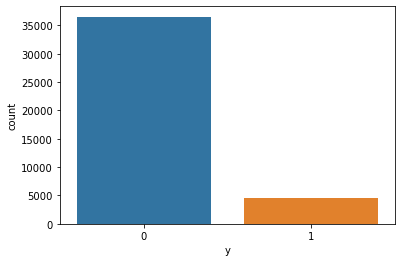

In [4]:
print(dataset.y.value_counts())
ax = sns.countplot(x="y", data=dataset)

# Vamos avaliar quais são as Features Categóricas, para avaliarmos qual técnica sera aplicada

In [5]:
# Pegando os tipos de dados no Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Avaliando se tem valores faltantes
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Vamos avaliar os valores contidos nas Features Categóricas

In [7]:
#identificando as instâncias existentes para os dados
dataset['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
#identificando as instâncias existentes para os dados
dataset['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
#identificando as instâncias existentes para os dados
dataset['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
#identificando as instâncias existentes para os dados
dataset['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [11]:
#identificando as instâncias existentes para os dados
dataset['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [12]:
#identificando as instâncias existentes para os dados
dataset['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [13]:
#identificando as instâncias existentes para os dados
dataset['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [14]:
#identificando as instâncias existentes para os dados
dataset['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

## As Features que tem mais de 3 classes, serão tratadas mais a frente

In [15]:
dataset["default"] = dataset["default"].map({"unknown": 0,"no":1,"yes":2})
dataset["housing"] = dataset["housing"].map({"unknown": 0,"no":1,"yes":2})
dataset["loan"] = dataset["loan"].map({"unknown": 0,"no":1,"yes":2})
dataset["contact"] = dataset["contact"].map({"cellular":0,"telephone":1})
dataset["poutcome"] = dataset["poutcome"].map({"nonexistent": 0, "failure":1, "success":2})

# As Features Month e Day_of_week, são features temporais

In [16]:
#identificando as instâncias existentes para os dados
dataset['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [17]:
dataset.month = pd.to_datetime(dataset.month, format = "%b").dt.month

In [18]:
#identificando as instâncias existentes para os dados
dataset['month'].value_counts()

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

In [19]:
#identificando as instâncias existentes para os dados
dataset['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [20]:
dataset.day_of_week = dataset.day_of_week.map({"mon": 0, "tue":1, "wed":2, "thu":3, "fri":4})

In [21]:
#identificando as instâncias existentes para os dados
dataset['day_of_week'].sort_values().value_counts()

3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64

In [22]:
#Checando novamente se existe valores nulos
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Aplicando o Get_Dummies, para tratar as classes categóricas remanescentes